In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('../../../datasets/Salary_Data_multi.csv')

In [3]:
df.shape

(30, 3)

In [4]:
df['Salary'].max(),df['Salary'].min()

(122391, 37731)

In [5]:
column_to_drop='Age'
df=df.drop(column_to_drop,axis=1)

In [6]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


(0.0, 150000.0)

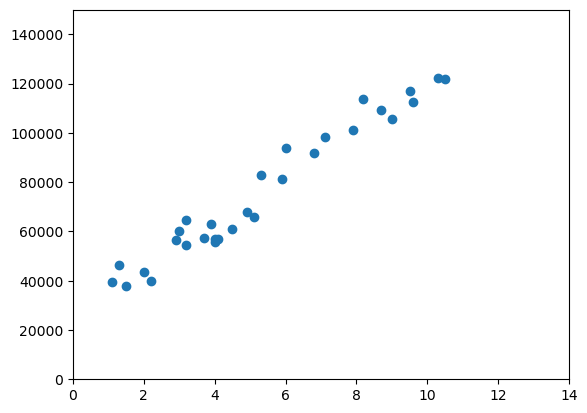

In [9]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlim([0,14])
plt.ylim([0,150000])

In [10]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [11]:
X=[['YearsExperience']]
y=df['Salary']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [13]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [14]:
type(X)

list

In [15]:
type(y)

pandas.core.series.Series

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
df['YearsExperience'] = pd.to_numeric(df['YearsExperience'])
df['Salary'] = pd.to_numeric(df['Salary'])  

In [18]:
df = df.dropna()


In [19]:
X= df[['YearsExperience']]
y = df['Salary']


In [20]:
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [21]:
model.intercept_

25792.20019866871

In [22]:
model.coef_

array([9449.96232146])

In [23]:
q=[[0],[5],[10]]
yp=model.predict(q)
yp

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 25792.20019867,  73042.01180594, 120291.82341322])

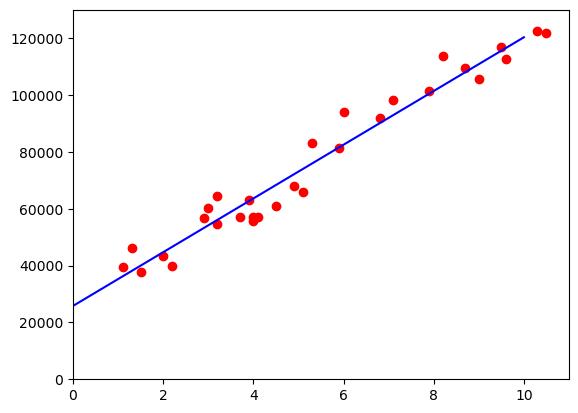

In [24]:
plt.scatter(df['YearsExperience'],df['Salary'],c='red')
plt.xlim([0,11])
plt.ylim([0,130000])
plt.plot(q,yp,c='blue')

In [25]:
print(model.predict([[5]]))

[73042.01180594]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Evalution

In [26]:
model.score(X,y)

0.9569566641435086

In [27]:
ya=y
yp=model.predict(X)
yp

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [28]:
import numpy as np

In [29]:
u=np.sum((yp-ya)**2)
v=np.sum((ya-ya.mean())**2)
print(1-(u/v))

0.9569566641435086


In [30]:
import pickle

In [31]:
pickle.dump(model,open('model1.pkl','wb'))

In [32]:
load_model=pickle.load(open('model1.pkl','rb'))

In [33]:
load_model.predict([[3]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([54142.08716303])